<a href="https://colab.research.google.com/github/ahammedshaneebnk/ML_Support_Vector_Machines_Exercises/blob/main/svm_rbf_kernel_nonlinear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Question:**

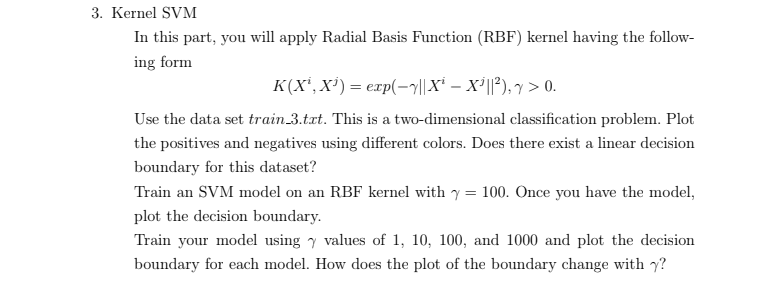

#**Answer:**

##**Data Analysis**

###***Read Training Set***

In [ ]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm

In [ ]:
# read training set 3 and convert into pandas dataframe
df = pd.read_csv('train_3.txt', delim_whitespace=' ', header=None)

# display the data
print(df)

            0         1  2
0   -0.158986  0.423977  1
1   -0.347926  0.470760  1
2   -0.504608  0.353801  1
3   -0.596774  0.114035  1
4   -0.518433 -0.172515  1
..        ...       ... ..
206 -0.399885 -0.621930  1
207 -0.124078 -0.126608  1
208 -0.316935 -0.228947  1
209 -0.294124 -0.134795 -1
210 -0.153111  0.184503 -1

[211 rows x 3 columns]


###***Check for Null Values***

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       211 non-null    float64
 1   1       211 non-null    float64
 2   2       211 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 5.1 KB
None


* **No null value** is present in the dataset

###***Basic Details***

In [ ]:
# rows and columns
print(df.shape)

(211, 3)


* Number of **Rows = 211**
* Number of **Columns = 3**
* Number of **Features = 2**

In [ ]:
# basic statistical details
print(df.describe())

                0           1           2
count  211.000000  211.000000  211.000000
mean    -0.130245   -0.059743    0.004739
std      0.200516    0.314751    1.002367
min     -0.596774   -0.657895   -1.000000
25%     -0.287903   -0.313889   -1.000000
50%     -0.130300   -0.052924    1.000000
75%      0.013825    0.192690    1.000000
max      0.297235    0.573392    1.000000


* There is a considerable **difference between the maximum values** of the two features (0.29 and 0.57), therefore performing **standardisation** is better before proceeding into training of the model.

###***Features Distribution***

Text(0.5, 0, 'X2')

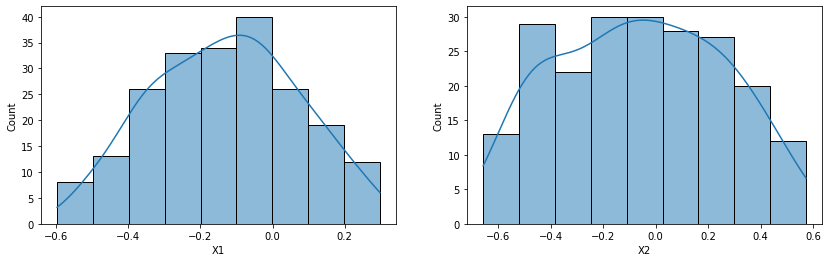

In [ ]:
plt.figure(figsize=(14,4))
# plot the histogram of 1st feature data
plt.subplot(121)
sns.histplot(data=df, x=0, kde=True)
plt.xlabel('X1')
# plot the histogram of 2nd feature data
plt.subplot(122)
sns.histplot(data=df, x=1, kde=True)
plt.xlabel('X2')

###***Feature Scaling***

Text(0.5, 0, 'X2')

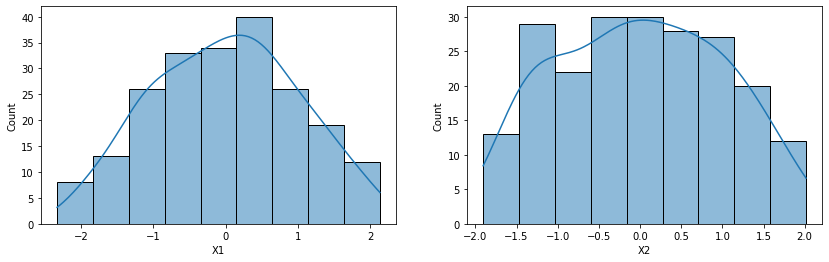

In [ ]:
df[0] = (df[0] - np.mean(df[0])) / np.std(df[0])
df[1] = (df[1] - np.mean(df[1])) / np.std(df[1])
plt.figure(figsize=(14,4))
# plot the histogram of 1st feature data
plt.subplot(121)
sns.histplot(data=df, x=0, kde=True)
plt.xlabel('X1')
# plot the histogram of 2nd feature data
plt.subplot(122)
sns.histplot(data=df, x=1, kde=True)
plt.xlabel('X2')

* After feature scaling, both features have values between -2 and +2 with mean 0.

##**Data Visualization**

Text(0.5, 1.0, 'Training Data')

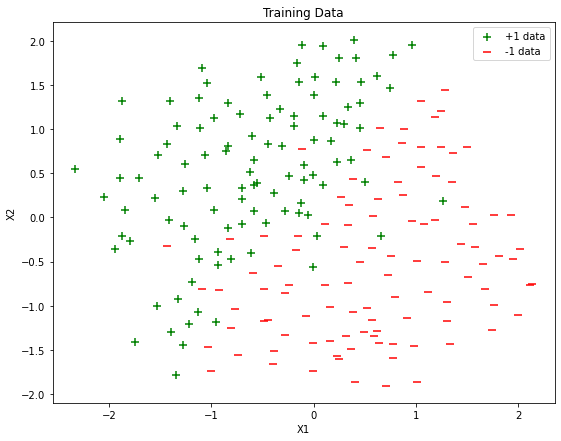

In [ ]:
# scatter plot
# output +1 => green and '+'
# output -1 => red and '-'
plt.figure(figsize=(9,7))
df1 = df.loc[df[2]==1]
df2 = df.loc[df[2]==-1]
plt.scatter(df1[0], df1[1], color='green', marker='+', s=60)
plt.scatter(df2[0], df2[1], color='red', marker='_', s=60)
plt.legend(['+1 data','-1 data'])
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Training Data')

* The data is **not linearly separable**.

##**SVM Implementation**

###**Function to Plot**

In [ ]:
# this function will provide the scatter plots

def plot_fun(model, df, color1, color2):

  # separating +1 and -1 data
  df1 = df.loc[df[2]==1]
  df2 = df.loc[df[2]==-1]
  plt.scatter(df1[0], df1[1], color=color1, marker='+', s=60)
  plt.scatter(df2[0], df2[1], color=color2, marker='_', s=60)
  plt.legend(['+1 data','-1 data'])
  plt.xlabel('X1')
  plt.ylabel('X2')

  # plot the decision function
  ax = plt.gca()
  xlim = ax.get_xlim()
  ylim = ax.get_ylim()

  # create grid to evaluate model
  xx = np.linspace(xlim[0], xlim[1], 30)
  yy = np.linspace(ylim[0], ylim[1], 30)
  XX, YY = np.meshgrid(xx, yy)
  xy = np.vstack([XX.ravel(), YY.ravel()]).T
  Z = model.decision_function(xy).reshape(XX.shape)


  # plot decision boundary and margins
  ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
            linestyles=['--', '-', '--'])
  # plot support vectors
  ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
            linewidth=1, facecolors='none', edgecolors='k')

###**Function to Find Error**

In [ ]:
# This function will provide the error

def err_fun(model, df):

  # prediction with the learned model
  predicted_labels = model.predict(df.iloc[:,:-1])
  error_count = 0

  # comparison with actual label
  for i in range(df.shape[0]):
    if predicted_labels[i] != df.iloc[i,-1]:
      error_count = error_count + 1

  # returns the error percentage
  return (error_count * 100 / df.shape[0])

###**Function to Train SVM: Linear Kernel**

In [ ]:
# This function will train the SVM and do all other needed operations
def svm_link(df, c):

  # training
  model = svm.SVC(kernel='linear', C = c)
  model.fit(df.iloc[:,:-1], df.iloc[:,-1])

  plt.figure(figsize=(9,7))

  plt.title('Training Data, C = %s'%(c))
  plot_fun(model, df, 'green', 'red')

  # support vector details
  print(f"{30*'==='}\n")
  print(f"Softmargin SVM with C = {c}\n")
  print(f"There are {len(model.support_vectors_)} support vectors in total.")
  # print(f"\nThey are as follows:\n")
  # for i in range(len(model.support_vectors_)):
  #   print(f"{i+1}. {model.support_vectors_[i]}\tLamda = \
  #   {model.dual_coef_[0][i]/(df.iloc[model.support_[i],-1])}")

  print(f"\nTraining Error = {err_fun(model, df)} %\n")

###**Function to Train SVM: Non-linear Kernel (RBF)**

In [ ]:
# This function will train the SVM and do all other needed operations
def svm_rbf(df, g):

  # training
  model = svm.SVC(kernel='rbf', gamma = g, C=1)
  model.fit(df.iloc[:,:-1], df.iloc[:,-1])

  plt.figure(figsize=(9,7))

  plt.title('Training Data, Gamma = %s'%(g))
  plot_fun(model, df, 'blue', 'magenta')

  # support vector details
  print(f"{30*'==='}\n")
  print(f"SVM with RBF Kernel, Gamma = {g}\n")
  print(f"There are {len(model.support_vectors_)} support vectors in total.")
  # print(f"\nThey are as follows:\n")
  # for i in range(len(model.support_vectors_)):
  #   print(f"{i+1}. {model.support_vectors_[i]}\tLamda = \
  #   {model.dual_coef_[0][i]/(df.iloc[model.support_[i],-1])}")

  print(f"\nTraining Error = {err_fun(model, df)} %\n")

###**Softmargin SVM with Linear Kernel, C = 1**


Softmargin SVM with C = 1

There are 59 support vectors in total.

Training Error = 6.6350710900473935 %



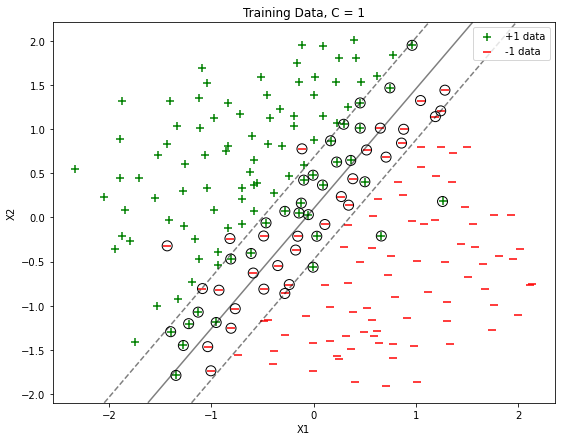

In [ ]:
svm_link(df, 1)

* Even though our data is not linearly separable, by allowing few misclassifications, we can come up with a linear model as above. Though not the best, this is a good model for our data.

###**RBF Kernel, Gamma = 1000**


SVM with RBF Kernel, Gamma = 1000

There are 211 support vectors in total.

Training Error = 0.0 %



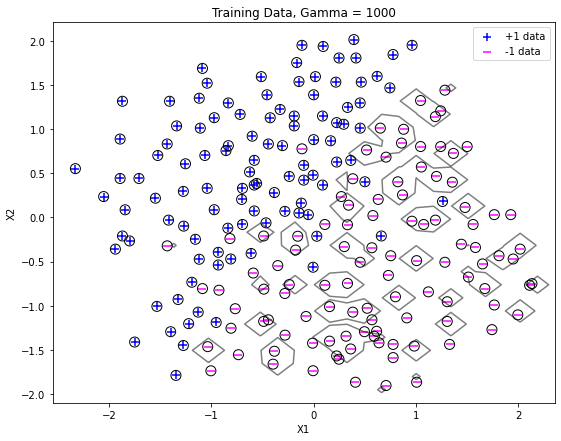

In [ ]:
svm_rbf(df, 1000)

* **All the datapoints were considered as support vectors** and **zero training error** is obtained which is nothing but **overfitting** of the data.

###**RBF Kernel, Gamma = 100**


SVM with RBF Kernel, Gamma = 100

There are 209 support vectors in total.

Training Error = 0.0 %



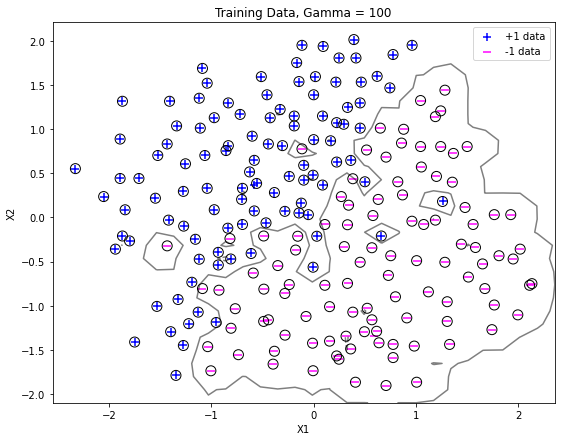

In [ ]:
svm_rbf(df, 100)

* **Majority of the datapoints are regarded as support vectors** and the **training error is obtained as zero** which again indicates **overfitting** of the data.

###**RBF Kernel, Gamma = 10**


SVM with RBF Kernel, Gamma = 10

There are 159 support vectors in total.

Training Error = 5.213270142180095 %



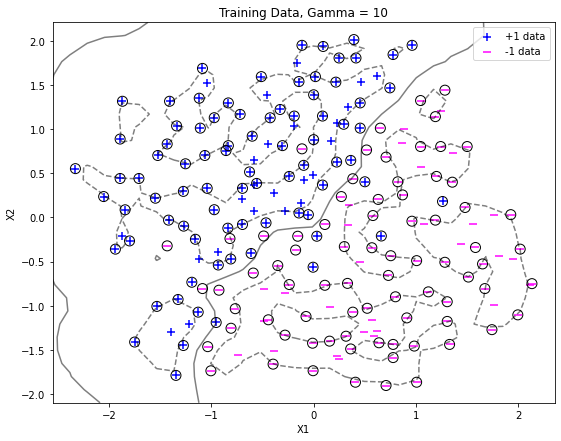

In [ ]:
svm_rbf(df, 10)

* Since there was around 5% training error, it is not a perfect overfitting but again, **majority of the datapoints are considered as support vectors**, therefore this model **would not perform well on unseen data**.

###**RBF Kernel, Gamma = 1**


SVM with RBF Kernel, Gamma = 1

There are 70 support vectors in total.

Training Error = 5.687203791469194 %



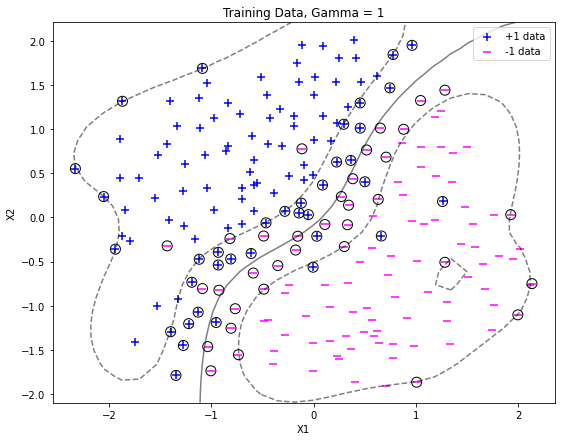

In [ ]:
svm_rbf(df, 1)

* Here, there is around 5.6% training error which indicates there is **no overfitting** of the data, and **only 70 datapoints were regarded as support vectors** which suggests this is a good model. Also, a **non-linear hypersurface** is clearly visibile on the plot, and gives an **intuition that this model will perform well on unseen data** too.

###**RBF Kernel, Gamma = 0.1**


SVM with RBF Kernel, Gamma = 0.1

There are 83 support vectors in total.

Training Error = 7.109004739336493 %



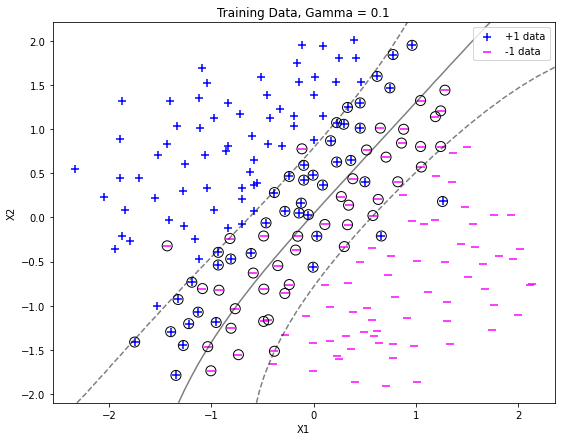

In [ ]:
svm_rbf(df, .1)

* Compared to previous case, **more training error and more support vectors** were observed.

###**RBF Kernel, Gamma = 0.01**


SVM with RBF Kernel, Gamma = 0.01

There are 132 support vectors in total.

Training Error = 10.42654028436019 %



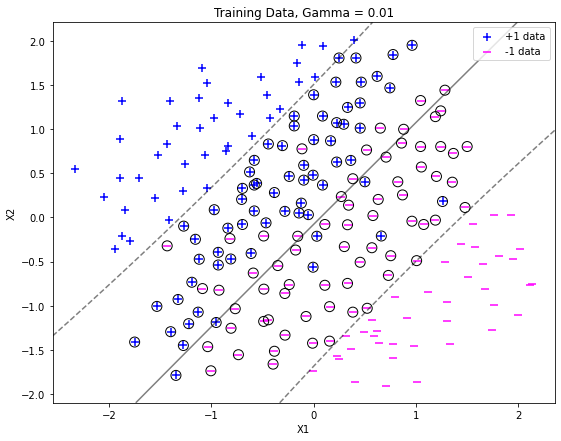

In [ ]:
svm_rbf(df, .01)

* Since the gamma value is very less, this **behaves like a linear model**, and the **training error is very high**, moreover **majority of the datapoints were considered as support vectors**.

##**Conclusion**

* The given dataset has been analyzed and **feature scaling** was carried out as the initial values of the features were not on the same scale.
* **No null values** were present in the training data and there were **211 instances and 2 features**.
* The data set was corresponding to **binary classification** with labels -1 and +1.
* The training data has been visualized with the help of **scatter plot** and found that the data is **not linearly separable**.
* The softmargin SVM was implemented with **linear kernel** with C=1 and the obtained model was not so bad.
* SVM with **RBF kernel** was implemented with different $\gamma$ values (1000, 100, 10, 1, 0.1 and 0.01) and the results were plotted and analyzed. In all cases, C=1 was used.
* In this particular experiment, **when the $\gamma$ values were large, overfitting** was observed as the training error was obtained as zero and almost all the datapoints were regarded as support vectors.
* Even **when the $\gamma$ values were low**, the model was not good as it was found to be **more linear** with high training error.
* **Pretty good result was obtained when $\gamma = 1$ was used**. It provided a clear **non-linear hypersurface** with comparatively **less training error (5.6%) without overfitting the data and never treated a lot of datapoints as support vectors (only 70).**

##**Submitted By:**

####Ahammed Shaneeb N K

####M1, AI: Roll No - 2